# Car Price Prediction - using XGBoost Regression

An automobile company outisde US aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

Business Goal - You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### The solution is divided into the following sections:
- Data understanding and exploration
- Data cleaning.
- Data Analysis.
- Data preparation.
- Model building.
- Prediction and Model evaluation.

## Data understanding and exploration

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.metrics import r2_score,mean_squared_error

from scipy.stats import boxcox

import xgboost as xgb

import math

from joblib import dump, load


import warnings
warnings.filterwarnings('ignore')

In [15]:
# Setting Display Max columns and display max rows to None so that it displays all the rows and columns which will 
# help us in initial analysis
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [16]:
car_df = pd.read_csv("../data/CarPrice_Assignment.csv")

In [17]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
car_df.shape

(205, 26)

In [19]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [20]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
# Checking the percentage of missing values across all the columns
round(100*(car_df[car_df.columns].isnull().sum()/len(car_df.index)),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

## Data cleaning

In [22]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
car_df['car_ID'].nunique()<205

False

In [24]:
car_df = car_df.drop('car_ID',axis=1)

In [25]:
car_df = car_df.drop('CarName',axis=1)

In [26]:
car_df = car_df.drop('symboling',axis=1)

## Data Analysis

In [27]:
# Created a function to plot bar graph between independent variables and price (dependent variable)

def plotBarGraph(df,xLabel,yLabel,graphSize=[]):
    barData = df.plot(kind="bar",figsize=graphSize)
    barData.set_xlabel(xLabel)
    barData.set_ylabel(yLabel)

    for p in barData.patches:
        barData.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')

In [28]:
car_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [29]:
car_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [30]:
car_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [31]:
car_df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [32]:
car_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [33]:
car_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [34]:
car_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [35]:
car_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [36]:
# car_df['symboling'].value_counts()

In [37]:
#  3 => very high risk
#  2 => high risk
#  1 => moderate risk
#  0 => less risk
# -1 => safe
# -2 => very safe

In [38]:
# symboling_dict_map = {3:'very high risk' , 2:'high risk', 1:'moderate risk', 0:'less risk', -1:'safe', -2:'very safe'}
# car_df['symboling'] = car_df['symboling'].map(symboling_dict_map)

In [39]:
# symboling_dist = pd.pivot_table(car_df,index='symboling',values='price',aggfunc='mean').sort_values(by='symboling',ascending=True)
# plotBarGraph(symboling_dist, 'Symboling', 'Price',[8,5])

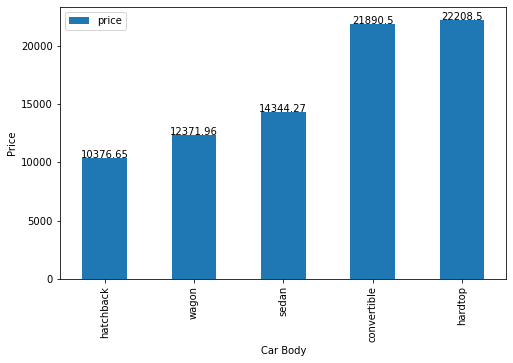

In [40]:
carbody_dist = pd.pivot_table(car_df,index='carbody',values='price',aggfunc='mean').sort_values(by='price',ascending=True)
plotBarGraph(carbody_dist, 'Car Body', 'Price',[8,5])

In [41]:
np.array(sorted(car_df['enginesize'].unique()))

array([ 61,  70,  79,  80,  90,  91,  92,  97,  98, 103, 108, 109, 110,
       111, 119, 120, 121, 122, 130, 131, 132, 134, 136, 140, 141, 145,
       146, 151, 152, 156, 161, 164, 171, 173, 181, 183, 194, 203, 209,
       234, 258, 304, 308, 326])

In [42]:
car_df['enginesize_bucket'] = pd.cut(car_df['enginesize'],[0,50,100,150,200,250,300,350],labels=['0-5','50-100','100-150','150-200','200-250','250-300','300-350'])

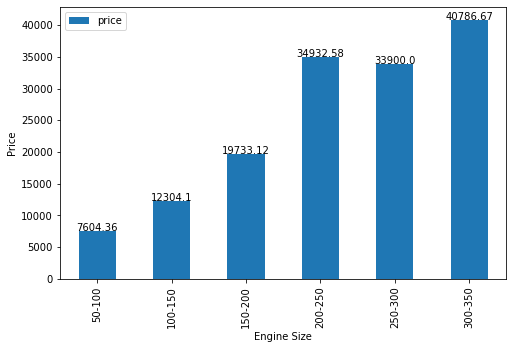

In [43]:
car_enginesize_dist = pd.pivot_table(car_df,index='enginesize_bucket',values='price',aggfunc='mean')
plotBarGraph(car_enginesize_dist, 'Engine Size', 'Price',[8,5])

In [44]:
# Created a model with engine size buckets but at last when try to understand the top 7-10 features which are importance in 
# terms of price prediction then found engine size of different buckets are present as a result we couldn't understand the 
# importance of other features much.
car_df = car_df.drop('enginesize_bucket', axis=1)

In [45]:
np.array(sorted(car_df['peakrpm'].unique()))

array([4150, 4200, 4250, 4350, 4400, 4500, 4650, 4750, 4800, 4900, 5000,
       5100, 5200, 5250, 5300, 5400, 5500, 5600, 5750, 5800, 5900, 6000,
       6600])

In [46]:
# Bucketing the peak rpm across ranges to convert it to a categorical variable
car_df['peakrpm_bucket'] = pd.cut(car_df['peakrpm'],[4000,4500,5000,5500,6000,6500,7000],labels=['4000-4500','4500-5000','5000-5500','5500-6000','6000-6500','6500-7000'])

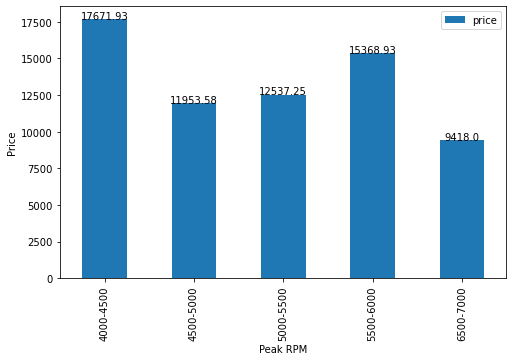

In [47]:
car_peakrpm_dist = pd.pivot_table(car_df,index='peakrpm_bucket',values='price',aggfunc='mean')
plotBarGraph(car_peakrpm_dist, 'Peak RPM', 'Price',[8,5])

In [48]:
# Created a model with peakrpm_bucket but found that with or without bucket it didn't create any significant difference.
car_df = car_df.drop('peakrpm_bucket', axis=1)

In [49]:
# Collating all numeric features under one list
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
car_num_cols = list(car_df.select_dtypes(include=numerics).columns)
car_num_cols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [50]:
# car_categorical = car_df.select_dtypes(include=['object'])
# car_categorical.head()

In [51]:
# Collating all categorical features under one list
car_cat_cols = list(car_df.select_dtypes(exclude=numerics).columns)
car_cat_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [52]:
# Checking the correlation amoung the numerical variables in the dataset
car_corr = car_df[car_num_cols].corr()
car_corr

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


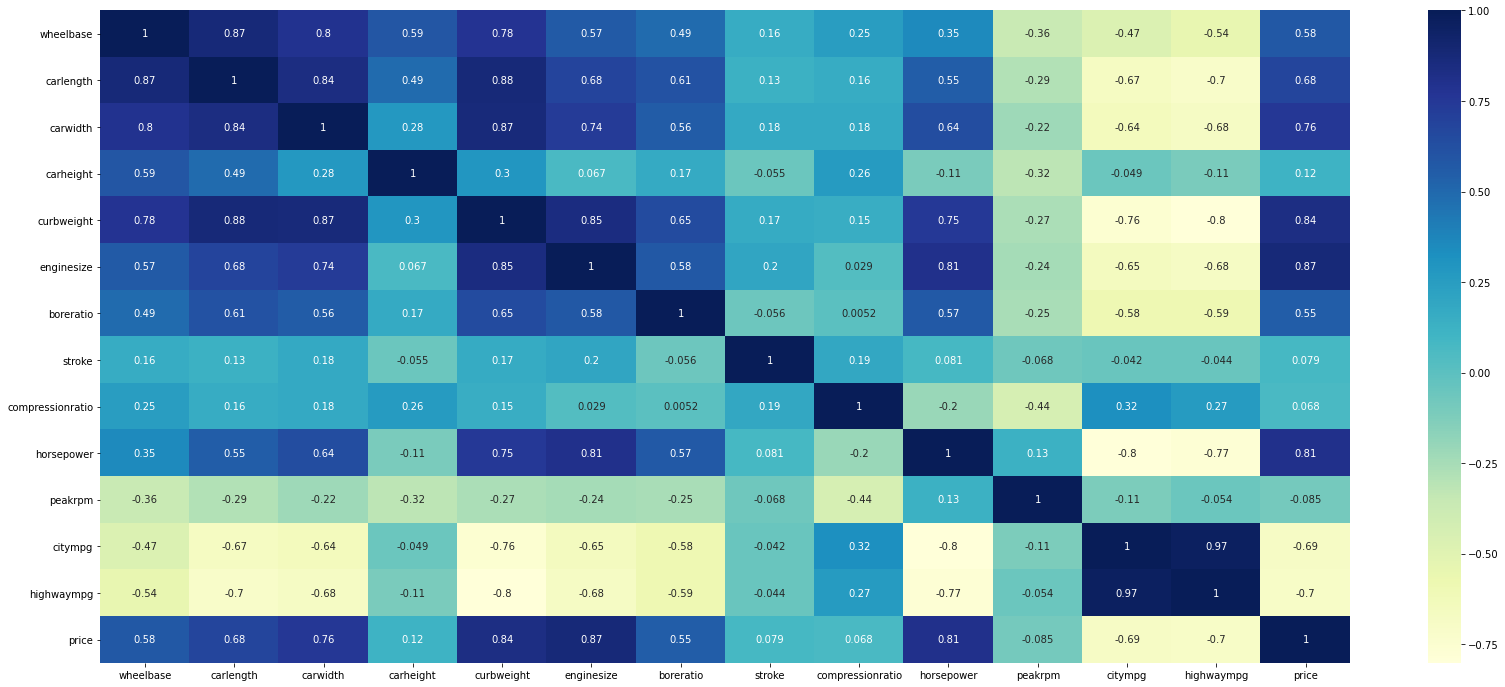

In [53]:
# Plotting the correlation among numerical variables on a heat map
plt.figure(figsize=(28,12))

# plotting heatmap
sns.heatmap(car_corr, cmap="YlGnBu", annot=True)
plt.show()

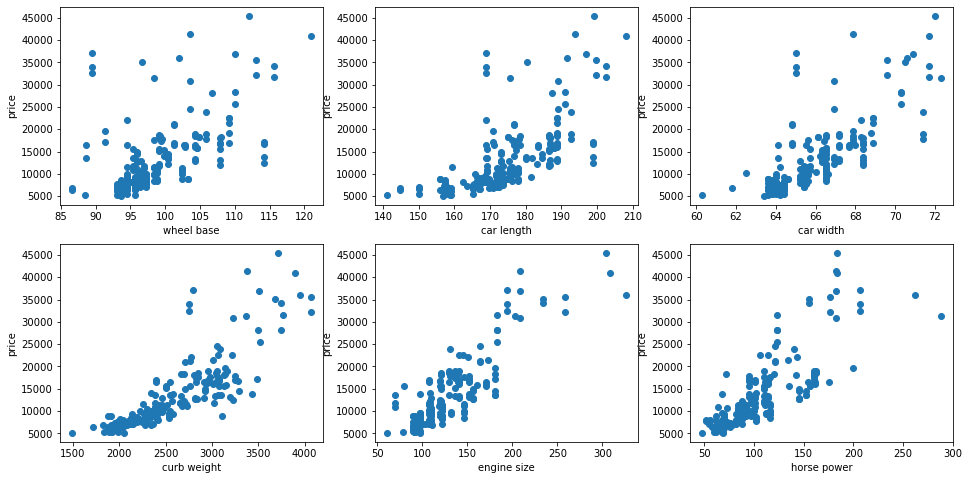

In [54]:
# Doing the scatter plot for some of the variables which are highly correlated with the target variable

plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.xlabel("wheel base")
plt.ylabel("price")
plt.scatter(car_df['wheelbase'],car_df['price'])
plt.subplot(2,3,2)
plt.xlabel("car length")
plt.ylabel("price")
plt.scatter(car_df['carlength'],car_df['price'])
plt.subplot(2,3,3)
plt.xlabel("car width")
plt.ylabel("price")
plt.scatter(car_df['carwidth'],car_df['price'])
plt.subplot(2,3,4)
plt.xlabel("curb weight")
plt.ylabel("price")
plt.scatter(car_df['curbweight'],car_df['price'])
plt.subplot(2,3,5)
plt.xlabel("engine size")
plt.ylabel("price")
plt.scatter(car_df['enginesize'],car_df['price'])
plt.subplot(2,3,6)
plt.xlabel("horse power")
plt.ylabel("price")
plt.scatter(car_df['horsepower'],car_df['price'])

<AxesSubplot:xlabel='carbody', ylabel='price'>

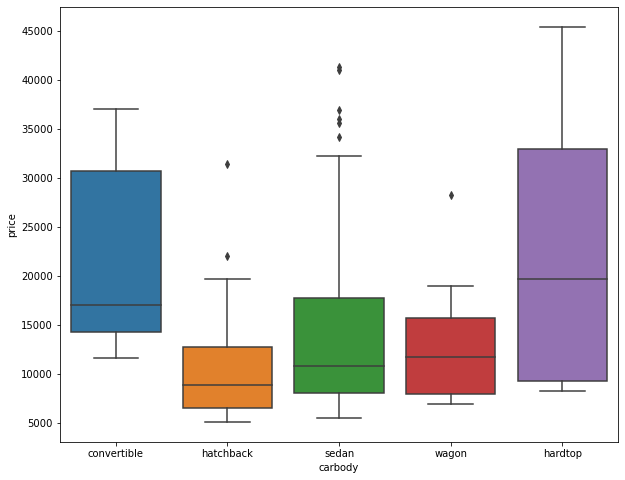

In [55]:
# Created a box plot to check the price distribution across various categories of car body
plt.figure(figsize=(10,8))
sns.boxplot(x= car_df.carbody, y = car_df.price)

<AxesSubplot:xlabel='price', ylabel='Density'>

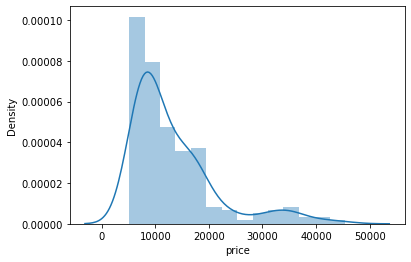

In [56]:
# Checking the distribution of price data
sns.distplot(car_df.price)

<AxesSubplot:title={'center':'Car horsepower plot'}, xlabel='horsepower', ylabel='Density'>

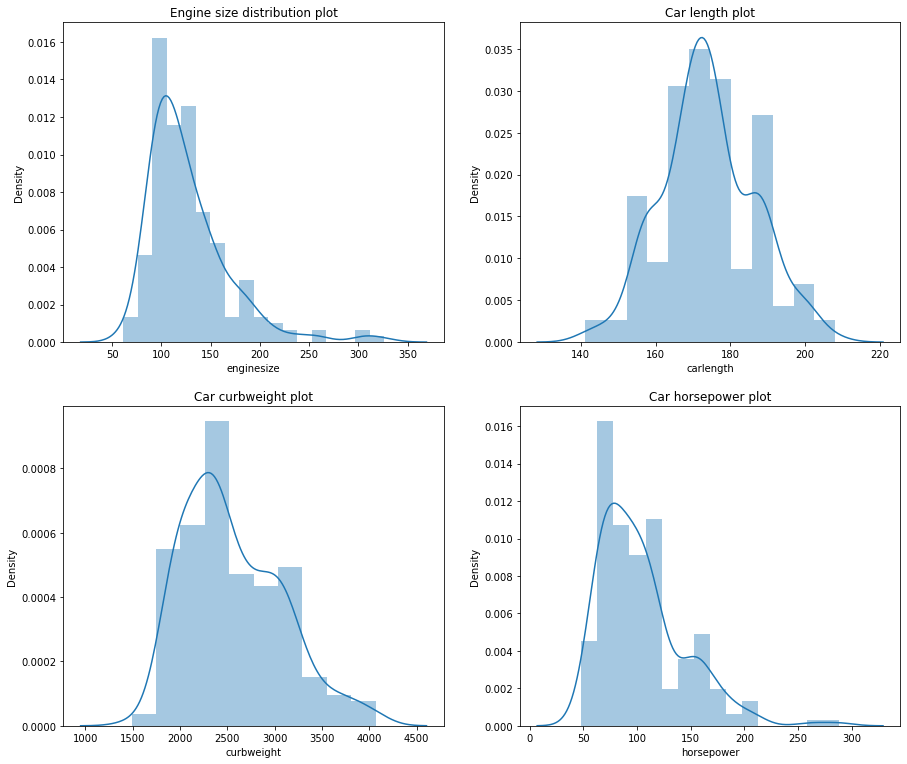

In [57]:
# Checking the data distribution across multiple variables

fig = plt.figure(figsize=(15,20),edgecolor='b')

plt.subplot(3,2,1)
plt.title('Engine size distribution plot')
sns.distplot(car_df.enginesize) 

plt.subplot(3,2,2)
plt.title('Car length plot')
sns.distplot(car_df.carlength) 

plt.subplot(3,2,3)
plt.title('Car curbweight plot')
sns.distplot(car_df.curbweight) 

plt.subplot(3,2,4)
plt.title('Car horsepower plot')
sns.distplot(car_df.horsepower) 

### Outlier Analysis

In [58]:
# Doing describe to check the spread of values and also to detect outliers across all numerical fields
car_df.describe(percentiles=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
5%,93.020000,157.140000,63.600000,49.700000,1901.000000,90.000000,2.970000,2.640000,7.500000,62.000000,4250.000000,16.000000,22.000000,6197.000000
10%,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
20%,94.500000,165.300000,63.900000,51.400000,2048.000000,97.000000,3.050000,3.070000,8.500000,69.000000,4800.000000,19.000000,24.800000,7385.800000
30%,95.300000,168.720000,64.400000,52.420000,2242.800000,98.000000,3.150000,3.150000,8.700000,76.000000,4800.000000,21.000000,26.000000,8022.000000
40%,95.960000,171.500000,65.200000,53.000000,2333.400000,109.000000,3.190000,3.230000,9.000000,87.200000,5000.000000,23.600000,29.000000,9036.600000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000


In [59]:
# not removing outliers

## Data preparation

In [60]:
# # Creating dummy variables inorder to convert categorical variables to numeric
# car_dummies = pd.get_dummies(car_df[car_cat_cols], drop_first=True)
# car_dummies.head()

In [61]:
# Performing one hot encoding inorder to convert categorical variables to numeric
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
ohe.fit(car_df[car_cat_cols])
car_ohe = ohe.transform(car_df[car_cat_cols])
car_df_ohe = pd.DataFrame(car_ohe, columns = ohe.get_feature_names(input_features = car_cat_cols))
car_df_ohe.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
dump(ohe, '../models/ohe.joblib')

['../models/ohe.joblib']

In [63]:
car_df = car_df.drop(list(car_cat_cols), axis=1)

In [64]:
car_df = pd.concat([car_df, car_df_ohe], axis=1)

In [65]:
car_df.shape

(205, 52)

In [66]:
car_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
X=car_df
y=car_df.pop('price')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [69]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,train_size=0.5,random_state=42)

In [70]:
car_num_cols.remove('price')
scaler=StandardScaler()
scaler.fit(X_train[car_num_cols])

X_train[car_num_cols] = scaler.transform(X_train[car_num_cols])
X_test[car_num_cols] = scaler.transform(X_test[car_num_cols])

In [71]:
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

## Model building

In [72]:
xgb_reg = xgb.XGBRegressor(n_jobs = -1) # default paramters
xgb_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [73]:
# Fitting the XGBRegression model on the train dataset
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [74]:
# Predicting on the test dataset
y_pred_test = xgb_reg.predict(X_test)

r2score = round(r2_score(y_pred_test,y_test),2)*100

In [75]:
print("R2 Score on Test Data is : ",r2score)

R2 Score on Test Data is :  95.0


In [76]:
mse = mean_squared_error(y_test, y_pred_test)

rmse = round(math.sqrt(mse),2)

print(rmse)

1775.33


## HPT - Random Search for Xgboost Regression

In [77]:
# Performing RandomizedSearchCV for hyperparameter tuning
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 100

random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=folds, verbose=3, random_state=42)

random_search.fit(X_val, y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimato...
                                          subsample=1, tree_method='exact',
                                          validate_parameters=1,
       

In [78]:
# Printing the best score that we can get using the parameters
print('We can get score of :',random_search.best_score_,' using',random_search.best_params_)

We can get score of : 0.7410594248107529  using {'subsample': 0.6, 'n_estimators': 750, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.25, 'gamma': 1, 'colsample_bytree': 0.6}


In [79]:
# Creating XGBRegression model with the select hyperparameters
xgb_reg_hpt = xgb.XGBRegressor(subsample=0.6, n_estimators=500, min_child_weight=1,max_depth=4,
                               learning_rate=0.01, gamma=1, colsample_bytree=0.6, n_jobs = -1)
xgb_reg_hpt.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.6,
 'enable_categorical': False,
 'gamma': 1,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.01,
 'max_delta_step': None,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 500,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': 0.6,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [80]:
xgb_reg_hpt.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
# Predicting on the test set
y_pred_test_hpt = xgb_reg_hpt.predict(X_test)

# Calculating R2 score on test set
r2score = round(r2_score(y_pred_test_hpt,y_test),2)*100

In [82]:
print("R2 score on Test Data is : ",r2score)

R2 score on Test Data is :  95.0


In [83]:
mse = mean_squared_error(y_test, y_pred_test_hpt)

rmse = round(math.sqrt(mse),2)

print(rmse)

1596.54


As the R2 score is same but RMSE score is lesser post hyperparameter tuning compared to the model with default parameter, hence would proceed with the tuned model.

In [84]:
dump(xgb_reg_hpt, '../models/XGBoost.joblib')

['../models/XGBoost.joblib']

## Prediction and Model evaluation

In [85]:
y_train_pred = xgb_reg_hpt.predict(X_train)
y_test_pred = xgb_reg_hpt.predict(X_test)

r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 score on Training data : ",round(r2_train_lr,2)*100)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 score on Test data : ",round(r2_test_lr,2)*100)

R2 score on Training data :  98.0
R2 score on Test data :  95.0


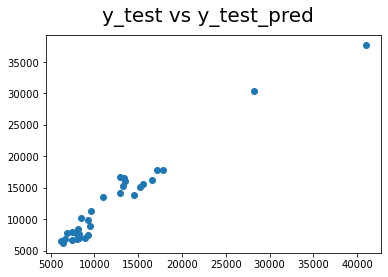

In [86]:
# Plotting a scatter plot of the actual and predicted values of the test set
fig = plt.figure()
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.scatter(y_test,y_test_pred)

In [87]:
# Creating a dataframe containing the features names and its corresponding coefficient values
linear_model_parameter = list(abs(xgb_reg_hpt.feature_importances_))
cols = X_train.columns
lm_model_df = pd.DataFrame(list(zip(cols,linear_model_parameter)))
lm_model_df.columns = ['Feaure','Coef']

In [88]:
lm_model_df = lm_model_df[lm_model_df['Coef']>0]

In [89]:
# Sorted the created dataframe containing the features names and its corresponding coefficient values in descending order 
# inorder to get the top coefficients
lm_model_df.sort_values(by='Coef',ascending=False).reset_index(drop=True)

,Feaure,Coef
0,enginesize,0.197809
1,cylindernumber_four,0.177516
2,highwaympg,0.101270
3,horsepower,0.077686
4,curbweight,0.077091
5,citympg,0.068877
6,carwidth,0.040731
7,fuelsystem_mpfi,0.025393
8,aspiration_turbo,0.019786
9,carbody_hardtop,0.017279


### We see that the above list of features sorted in descending order gives us the feature importance while prediction.